In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import radians, cos, sin, asin, sqrt

In [2]:
### Purpose: Return surrounding postcodes within radius of selected postcode
### App can be found at: https://rangewell-postcode.herokuapp.com/

In [3]:
postcode_url = 'https://www.freemaptools.com/download-uk-postcode-lat-lng.htm'

In [5]:
aorig = pd.read_csv('postcode-outcodes.csv', header=0, index_col=0)

print(aorig.shape)
aorig.head()

(3003, 3)


,postcode,latitude,longitude
id,,,
2,AB10,57.13514,-2.11731
3,AB11,57.13875,-2.09089
4,AB12,57.10100,-2.11060
5,AB13,57.10801,-2.23776
6,AB14,57.10076,-2.27073


In [21]:
# remove non-geo postcodes

aedit = aorig.copy()

aedit = aedit[(aedit.latitude != 0) & (aedit.longitude != 0)]

print(aedit.shape)

(2975, 3)


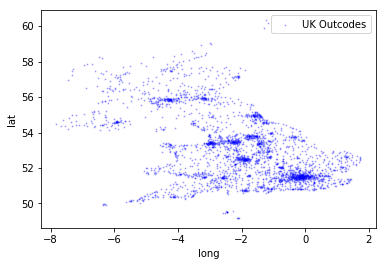

In [22]:
plt.scatter(x = aedit.longitude.values[:],
            y = aedit.latitude.values[:],
            color='blue', s=1, label='UK Outcodes', alpha=0.25
           )

plt.legend(loc=0)
plt.xlabel('long')
plt.ylabel('lat')


plt.show()

In [25]:
aedit.describe()

,latitude,longitude
count,2975.000000,2975.000000
mean,53.021260,-2.039945
std,1.873768,1.834488
min,49.185810,-7.826400
25%,51.516895,-3.175780
50%,52.585880,-1.879500
75%,54.048605,-0.472225
max,60.330470,1.734480


In [27]:
# current sample == [2193, 2648, 2334, 177, 1814]

asample = aedit.sample(5)

asample.head()

,postcode,latitude,longitude
id,,,
2193,S71,53.57342,-1.45629
2648,TS8,54.52141,-1.23054
2334,SM6,51.35984,-0.14267
177,BD9,53.81179,-1.78888
1814,NW5,51.55139,-0.14209


In [31]:
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    https://stackoverflow.com/questions/42686300/how-to-check-if-coordinate-inside-certain-area-python
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 3956 # 6371 in kilometers
    return c * r

In [38]:
center_point = [{'lat': 51.467645, 'lng': -0.202951}] 
test_point = [{'lat': 51.454273, 'lng': -0.201978}]  

lat1 = center_point[0]['lat']
lon1 = center_point[0]['lng']
lat2 = test_point[0]['lat']
lon2 = test_point[0]['lng']

radius = 1.00 # in files

a = haversine(lon1, lat1, lon2, lat2)

print('Distance (miles) : ', a)
if a <= radius:
    print('Inside the area')
else:
    print('Outside the area')

Distance (miles) :  0.9242210665577142
Inside the area


## Implement Function

In [62]:
target = [57.13514, -2.11733] # lat lon format

aedit['Distance'] = aedit.apply(lambda x: haversine(target[1], target[0], x['longitude'], x['latitude']), axis=1)

aedit.head(10)

,postcode,latitude,longitude,Distance
id,,,,
2,AB10,57.13514,-2.11731,0.000749
3,AB11,57.13875,-2.09089,1.021484
4,AB12,57.10100,-2.11060,2.370665
5,AB13,57.10801,-2.23776,4.887169
6,AB14,57.10076,-2.27073,6.220960
7,AB15,57.13868,-2.16525,1.811944
8,AB16,57.16115,-2.15543,2.293807
9,AB21,57.20960,-2.20033,6.006886
10,AB22,57.18724,-2.11913,3.597888


In [63]:
print(len(aedit[aedit.Distance < 5]))

aedit[aedit.Distance < 5].head(10)

9


,postcode,latitude,longitude,Distance
id,,,,
2,AB10,57.13514,-2.11731,0.000749
3,AB11,57.13875,-2.09089,1.021484
4,AB12,57.10100,-2.11060,2.370665
5,AB13,57.10801,-2.23776,4.887169
7,AB15,57.13868,-2.16525,1.811944
8,AB16,57.16115,-2.15543,2.293807
10,AB22,57.18724,-2.11913,3.597888
12,AB24,57.16284,-2.11228,1.921883
13,AB25,57.15311,-2.11241,1.254356
